This notebook defines functions to draw elementary cellular automata, as defined in https://en.wikipedia.org/wiki/Elementary_cellular_automaton, and then gives some examples. 

This notebook uses the numbering system for rules described in the wikipedia article.

In [2]:
import numpy as np
import random
from PIL import Image
from IPython.display import display

In [2]:
def nextrow(rule_dict, boundary, row):
    #Given a row, a rule_dict, and a boundary condition, returns the next row.
    #A rule_dict has as keys all eight 3-tuples of 0s and 1s,
    #with the value associated to each key either 0 or 1.
    #The boundary should be a string equal to either "P", "00", "01", "10" or "11".
    #P means periodic boundary conditions.
    #The two-number strings mean that the first number is always the left boundary
    #and the second number is always the right boundary.
    if boundary == "P":
        L = row[-1]
        R = row[0]
    else:
        L = int(boundary[0])
        R = int(boundary[1])
    next_row=[rule_dict[(L,row[0],row[1])]]
    for i in range(1,len(row)-1):
        next_row.append(rule_dict[(row[i-1],row[i],row[i+1])])
    next_row.append(rule_dict[(row[-2],row[-1],R)])
    return next_row

def mainfun(rule_dict, boundary, initial, rows):
    #Returns a 0-1 array with the specified number of rows,
    #whose first row is the initial one.
    #Each row is constructed from the previous one using the rule_dict.
    final_array=[initial]
    for i in range(rows-1):
        final_array.append(nextrow(rule_dict, boundary, final_array[-1]))
    return final_array

def random_row(width, p = 0.5):
    #Returns a random 0-1 row, where each position has probability p of having value 1.
    return random.choices([0,1], weights=[1-p,p], k=width)

def singleton_row(width, pos=None):
    #Returns a row of given width that is all 0s except for a single 1
    #at the specified position. Default position for the 1 is the middle.
    if pos is None:
        pos = width//2
    output=np.zeros(width)
    output[pos]=1
    return output

def num_to_dict(n):
    #Given a number from 0 to 255, returns the rule_dict for the rule 
    #corresponding to that number, as described in the wikipedia article.
    bin_string='{0:08b}'.format(n)
    #I learned this line of code for converting numbers to binary strings here:
    #https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
    
    tuple_list=[(1, 1, 1), (1, 1, 0), (1, 0, 1), (1, 0, 0), (0, 1, 1), (0, 1, 0), (0, 0, 1), (0, 0, 0)]
    rule_dict={}
    for i in range(8):
        rule_dict[tuple_list[i]]=int(bin_string[i])
    return rule_dict
    
def display_01_array(z1_array):
    #z1_array should be an array of 0s and 1s. This will function will
    #display the array with 1s as black pixels and 0s as white ones.
    pil_im=Image.fromarray(((1-z1_array)*255).astype('uint8'), mode="P")
    display(pil_im)

def draw_CA(initial, height, rule_num=110, boundary="P"):
    image_array=np.array(mainfun(num_to_dict(rule_num),boundary, initial, height))
    display_01_array(image_array)

# Examples

The two simplest rules are 0 and 255. Rule 0 is always produces a constant row of 0s, and rule 255 always produces a constant row of 1s. These are called **Class 1** rules.

In [3]:
draw_CA(random_row(700,p=0.5), 20, boundary="P", rule_num=0)

In [4]:
draw_CA(random_row(700,p=0.5), 20, boundary="P", rule_num=255)

The next two simplest rules are 170 and 240. Rule 170 always shifts each row one cell to the left. Rule 240 always shifts each row one cell to the right.

In [5]:
draw_CA(random_row(700,p=0.3), 20, boundary="P", rule_num=170)

In [6]:
draw_CA(random_row(700,p=0.3), 20, boundary="P", rule_num=240)

Some rules tend to evolve to steady or repetitive states. These are called **Class 2** rules. Rule 108 is an example.

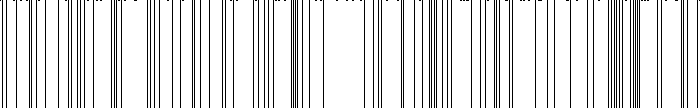

In [7]:
draw_CA(random_row(700,p=0.3), 108, boundary="P", rule_num=4)

Some rules with more complicated but fairly comprehensible behavior are rules 60 and 102. Their rules are based on mod 2 addition. For rule 60, each cell has the mod 2 sum of the values in the cells in the previous row that are in the same position and one position to the left. Rule 102 is the same, but adding the cell on the right instead of the left.

From a single 1 in the first row, they will generate mod 2 Pascal triangles, or in other words, [Sierpinski gaskets](https://en.wikipedia.org/wiki/Sierpi%C5%84ski_triangle).

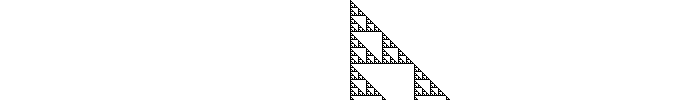

In [8]:
draw_CA(singleton_row(700),100,rule_num=60)

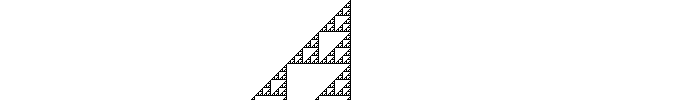

In [9]:
draw_CA(singleton_row(700),100,rule_num=102)

If the initial state is more complicated, the result will be overlapping Sierpinski gaskets.

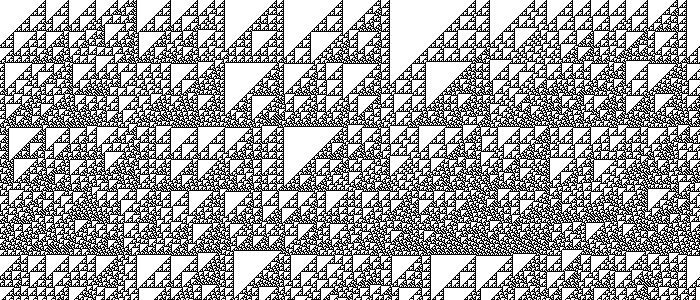

In [10]:
draw_CA(random_row(700,p=0.04),300,rule_num=102)

Some rules produce behavior that appears basically random. These are called **Class 3** rules. One example is [Rule 30](https://en.wikipedia.org/wiki/Rule_30).

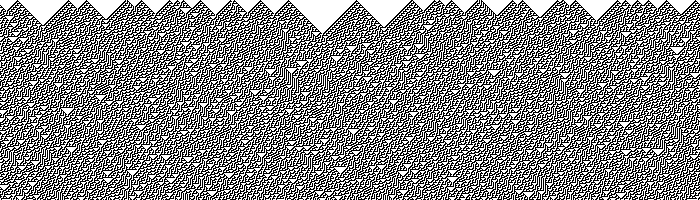

In [11]:
draw_CA(random_row(700,p=0.05),200,rule_num=30)

Some rules appear less random but display non-trivial interactions. These are known as **Class 4** rules and the most famous is [Rule 110](https://en.wikipedia.org/wiki/Rule_110), which is known to be capable of universal computation.

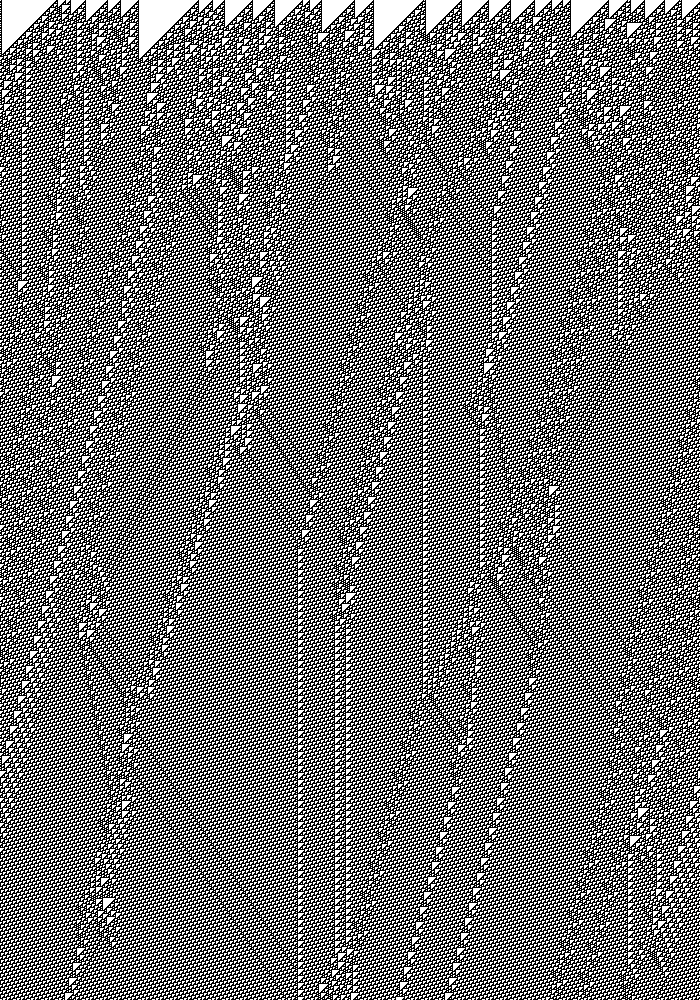

In [12]:
draw_CA(random_row(700,p=0.05), 1000, boundary="P", rule_num=110)